# Experimentos
ASALKSDJLKJ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Dataframes complementarios (Traducción de IDs)                                         # 1ra Columna   -> Resto de columnas
df_id_banco = pd.read_csv("data/ExtraccionDomiVersionFinal/CatBanco.csv")                # ID Banco      -> Nombre del banco
df_id_emisora = pd.read_csv("data/ExtraccionDomiVersionFinal/CatEmisora.csv")            # ID Emisora    -> Nombre Emisora, ID Banco, Emisora??, Tipo envío
df_id_respuesta = pd.read_csv("data/ExtraccionDomiVersionFinal/CatRespuestaBancos.csv")  # ID Respuesta  -> Descripción
#df_id_listacobro = pd.read_csv("data/ExtraccionDomiVersionFinal/ListaCobro.csv")         # ID ListaCobro -> Fecha creación, ID Banco, Fecha envío
df_id_listaemisor = pd.read_csv("data/ExtraccionDomiVersionFinal/ListaCobroEmisora.csv") # ID ListaCobro -> ID Emisora

# Dataframes detallados por año
df_2022 = pd.read_csv("data/ExtraccionDomiVersionFinal/ListaCobroDetalle2022.csv")
df_2023 = pd.read_csv("data/ExtraccionDomiVersionFinal/ListaCobroDetalle2023.csv")
df_2024 = pd.read_csv("data/ExtraccionDomiVersionFinal/ListaCobroDetalle2024.csv")
df_2025 = pd.read_csv("data/ExtraccionDomiVersionFinal/ListaCobroDetalle2025.csv")

/tmp/ipykernel_61134/2520454308.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv("data/ExtraccionDomiVersionFinal/ListaCobroDetalle2023.csv")


In [7]:
cobros_detallados = pd.concat([df_2022, df_2023, df_2024, df_2025], ignore_index=True)

print(cobros_detallados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10057440 entries, 0 to 10057439
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   idListaCobro      int64  
 1   idCredito         int64  
 2   consecutivoCobro  int64  
 3   idBanco           int64  
 4   montoExigible     float64
 5   montoCobrar       float64
 6   montoCobrado      float64
 7   fechaCobroBanco   object 
 8   idRespuestaBanco  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 690.6+ MB
None


In [8]:
# Standardize column names
df_id_banco = df_id_banco.rename(columns={'IdBanco': 'idBanco', 'Nombre': 'nombreBanco'})
df_id_respuesta = df_id_respuesta.rename(columns={'IdRespuestaBanco': 'idRespuestaBanco'})
df_id_emisora = df_id_emisora.rename(columns={'Nombre': 'nombreEmisora'})

# Drop duplicated columns
df_id_emisora = df_id_emisora.drop('IdBanco', axis=1)

In [9]:
# Merge ID columns
cobros_detallados = cobros_detallados.merge(df_id_banco, on='idBanco', how='left') # Obtener nombre de banco
cobros_detallados = cobros_detallados.merge(df_id_respuesta, on='idRespuestaBanco', how='left') # Obtener descripción de respuesta
cobros_detallados = cobros_detallados.merge(df_id_listaemisor, on='idListaCobro', how='left') # Obtener ID emisora

In [10]:
cobros_detallados.head()

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,nombreBanco,Descripcion,idEmisora
0,100613,83021,27169966,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
3,100613,110463,27169969,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51
4,100613,113755,27169948,2,340.62,340.62,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51


In [11]:
cobros_detallados = cobros_detallados.merge(df_id_emisora, on='idEmisora', how='left') # Obtener datos de emisora
cobros_detallados.head()

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,nombreBanco,Descripcion,idEmisora,nombreEmisora,Emisora,TipoEnvio
0,100613,83021,27169966,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,NaN,NaN,NaN
1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,NaN,NaN,NaN
2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,NaN,NaN,NaN
3,100613,110463,27169969,2,572.24,572.24,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,NaN,NaN,NaN
4,100613,113755,27169948,2,340.62,340.62,0.0,NaN,04,BANAMEX,Cuenta Insuficiencia Fondos,51,NaN,NaN,NaN


In [12]:
cobros_detallados['idEmisora'].value_counts()

idEmisora
6     3317241
5     2230021
21    1330431
36     897683
1      654356
10     252385
12     228029
17     223227
9      165384
25     114276
68     104259
22      84721
23      84151
2       63790
79      62096
34      51440
19      47656
13      44078
20      35053
15      19833
18      18346
51       5022
62       5003
7        4921
75       4583
67       3045
24       2278
54       1539
65       1269
16        914
78        369
14         20
3          17
11          2
45          1
4           1
Name: count, dtype: int64

## Análisis proporción de cobro en base a emisora

In [13]:
cobros_detallados['pagado'] = cobros_detallados['montoCobrado'] > 0
tasas_emisora_summary = cobros_detallados.groupby('idEmisora').agg(
    total_attempts=('pagado', 'count'),
    payment_rate=('pagado', 'mean')
).sort_values(by='payment_rate', ascending=False)


In [15]:
threshold = 500
tasas_emisora_summary = tasas_emisora_summary[tasas_emisora_summary['total_attempts'] > threshold]

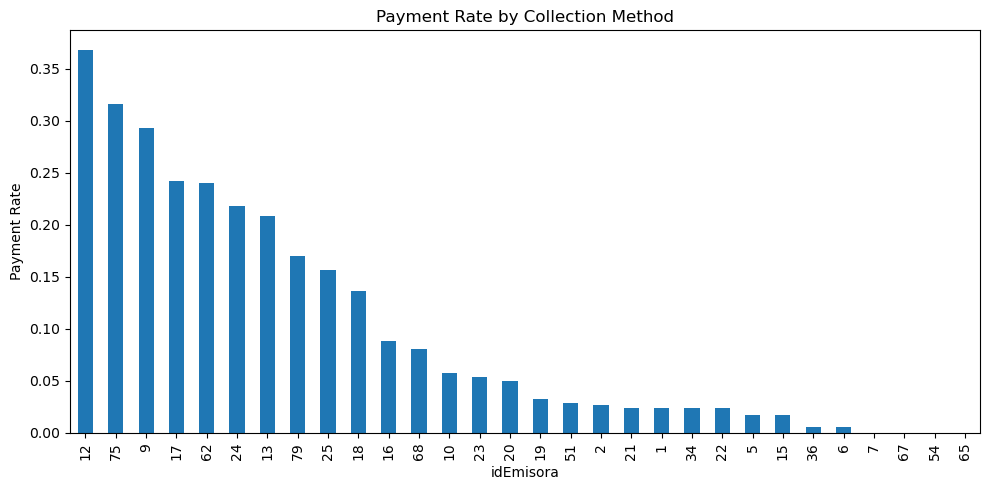

In [17]:
tasas_emisora_summary['payment_rate'].plot(kind='bar', figsize=(10, 5))
plt.title('Payment Rate by Collection Method')
plt.ylabel('Payment Rate')
plt.xlabel('idEmisora')
plt.tight_layout()
plt.show()